# Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import keras

# training data set

In [2]:
traindata = pd.read_table('train_FD003.txt',sep=' ',header=None)
traindata.head()

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,1,1,-0.0005,0.0004,100.0,518.67,642.36,1583.23,1396.84,14.62,...,8145.32,8.4246,0.03,391,2388,100.0,39.11,23.3537,NaN,NaN
1,1,2,0.0008,-0.0003,100.0,518.67,642.50,1584.69,1396.89,14.62,...,8152.85,8.4403,0.03,392,2388,100.0,38.99,23.4491,NaN,NaN
2,1,3,-0.0014,-0.0002,100.0,518.67,642.18,1582.35,1405.61,14.62,...,8150.17,8.3901,0.03,391,2388,100.0,38.85,23.3669,NaN,NaN
3,1,4,-0.0020,0.0001,100.0,518.67,642.92,1585.61,1392.27,14.62,...,8146.56,8.3878,0.03,392,2388,100.0,38.96,23.2951,NaN,NaN
4,1,5,0.0016,0.0000,100.0,518.67,641.68,1588.63,1397.65,14.62,...,8147.80,8.3869,0.03,392,2388,100.0,39.14,23.4583,NaN,NaN


In [3]:
traindata.shape

(24720, 28)

# RUL 

In [4]:
rul_given = pd.read_table('RUL_FD003.txt',sep=' ',header=None)
rul_given.head()

,0,1
0,44,NaN
1,51,NaN
2,27,NaN
3,120,NaN
4,101,NaN


# data pre-processing 

In [5]:
def preproc(df,key):
    
    # data preprocessing
    sensordata = df.drop([0,1,2,3,4,26,27],axis=1)
    cols = range(1,22)
    sensordata.columns = cols
    X = sensordata.drop([1,5,6,10,16,18,19],axis=1)
    
    # RUL creation
    g = df.groupby([0])
    d = (g.last()).sort_index().reset_index().drop_duplicates()
    d.drop(d.columns.difference([1]),axis=1,inplace=True)
    RUL_set = 115
    RUL = []
    
    if(key=='test'):
        rul_given = pd.read_table('RUL_FD003.txt',sep=' ',header=None)
        d[1] = d[1]+rul_given[0]
    
    for row in range(df.shape[0]):
        i = df[0][row] - 1
        if df[1][row] <= (d[1][i] - RUL_set):
            RUL.append(RUL_set)
        else:
            RUL.append(d[1][i] - df[1][row])
    RUL = np.asarray(RUL)  
    
    return X, RUL

In [6]:
X_train, Y_train = preproc(traindata,'train')
X_train.head()

,2,3,4,7,8,9,11,12,13,14,15,17,20,21
0,642.36,1583.23,1396.84,553.97,2387.96,9062.17,47.30,522.31,2388.01,8145.32,8.4246,391,39.11,23.3537
1,642.50,1584.69,1396.89,554.55,2388.00,9061.78,47.23,522.42,2388.03,8152.85,8.4403,392,38.99,23.4491
2,642.18,1582.35,1405.61,554.43,2388.03,9070.23,47.22,522.03,2388.00,8150.17,8.3901,391,38.85,23.3669
3,642.92,1585.61,1392.27,555.21,2388.00,9064.57,47.24,522.49,2388.08,8146.56,8.3878,392,38.96,23.2951
4,641.68,1588.63,1397.65,554.74,2388.04,9076.14,47.15,522.58,2388.03,8147.80,8.3869,392,39.14,23.4583


In [7]:
Y_train

array([115, 115, 115, ...,   2,   1,   0])

In [8]:
print("X_train shape: ",X_train.shape)
print("Y_train shape: ",Y_train.shape)

X_train shape:  (24720, 14)
Y_train shape:  (24720,)


# test data

In [9]:
testdata = pd.read_table('test_FD003.txt',sep=' ',header=None)
testdata.head()

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,1,1,-0.0017,-0.0004,100.0,518.67,641.94,1581.93,1396.93,14.62,...,8133.48,8.3760,0.03,391,2388,100.0,39.07,23.4468,NaN,NaN
1,1,2,0.0006,-0.0002,100.0,518.67,642.02,1584.86,1398.90,14.62,...,8137.44,8.4062,0.03,391,2388,100.0,39.04,23.4807,NaN,NaN
2,1,3,0.0014,-0.0003,100.0,518.67,641.68,1581.78,1391.92,14.62,...,8138.25,8.3553,0.03,391,2388,100.0,39.10,23.4244,NaN,NaN
3,1,4,0.0027,0.0001,100.0,518.67,642.20,1584.53,1395.34,14.62,...,8137.07,8.3709,0.03,392,2388,100.0,38.97,23.4782,NaN,NaN
4,1,5,-0.0001,0.0001,100.0,518.67,642.46,1589.03,1395.86,14.62,...,8134.20,8.4146,0.03,391,2388,100.0,39.09,23.3950,NaN,NaN


In [10]:
testdata.shape

(16596, 28)

In [11]:
X_test, Y_test = preproc(testdata,'test')
X_test.head()

,2,3,4,7,8,9,11,12,13,14,15,17,20,21
0,641.94,1581.93,1396.93,554.56,2387.93,9048.65,47.09,521.89,2387.94,8133.48,8.3760,391,39.07,23.4468
1,642.02,1584.86,1398.90,554.10,2387.94,9046.53,47.08,521.85,2388.01,8137.44,8.4062,391,39.04,23.4807
2,641.68,1581.78,1391.92,554.41,2387.97,9054.92,47.15,522.10,2387.94,8138.25,8.3553,391,39.10,23.4244
3,642.20,1584.53,1395.34,554.58,2387.94,9055.04,47.26,522.45,2387.96,8137.07,8.3709,392,38.97,23.4782
4,642.46,1589.03,1395.86,554.16,2388.01,9048.59,46.94,521.91,2387.97,8134.20,8.4146,391,39.09,23.3950


In [12]:
Y_test

array([115, 115, 115, ...,  30,  29,  28])

In [13]:
print("X_test shape: ",X_test.shape)
print("Y_test shape: ",Y_test.shape)

X_test shape:  (16596, 14)
Y_test shape:  (16596,)


# Plotting piecewise function

Text(0.5, 1.0, 'Training turbine 1')

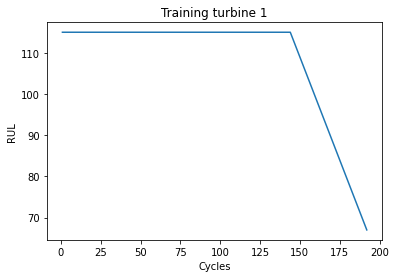

In [14]:
#on y_train

plt.plot(range(1,193),Y_train[0:192])
plt.xlabel('Cycles')
plt.ylabel('RUL')
plt.title('Training turbine 1')

Text(0.5, 1.0, 'Testing turbine 1')

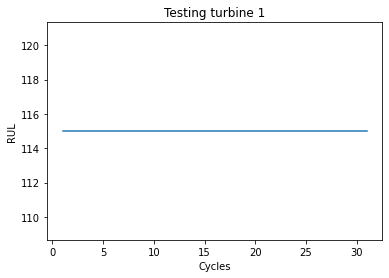

In [15]:
#on y_test

plt.plot(range(1,32),Y_test[0:31])
plt.xlabel('Cycles')
plt.ylabel('RUL')
plt.title('Testing turbine 1')

In [16]:
#X1, y1 = shuffle(X_train,Y_train, random_state=23)
X1, y1 = X_train, Y_train

In [17]:
from sklearn.preprocessing import MinMaxScaler
normaliser = MinMaxScaler(feature_range = (-1,1))
X1 = normaliser.fit_transform(X1)
X_test = normaliser.transform(X_test)

In [18]:
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.wrappers.scikit_learn import KerasRegressor
from keras.layers import Dense, Dropout, Conv1D, Flatten

def crt_model(activation):
    model = Sequential()
    model.add(Dense(650,input_dim=14, activation=activation,  kernel_initializer='glorot_uniform', kernel_regularizer='l2'))
    model.add(Dropout(0.5))
    model.add(Dense(650, activation=activation, kernel_initializer='glorot_uniform', kernel_regularizer='l2'))
    model.add(Dropout(0.5))
    model.add(Dense(450, activation=activation, kernel_initializer='glorot_uniform', kernel_regularizer='l2'))
    model.add(Dropout(0.5))
    model.add(Dense(350, activation=activation, kernel_initializer='glorot_uniform', kernel_regularizer='l2'))
    model.add(Dropout(0.5))
    model.add(Dense(250, activation=activation, kernel_initializer='glorot_uniform', kernel_regularizer='l2'))
    model.add(Dropout(0.5))
    model.add(Dense(150, activation=activation, kernel_initializer='glorot_uniform', kernel_regularizer='l2'))
    model.add(Dropout(0.5))
    model.add(Dense(1))
    model.compile(loss= "mean_squared_error" , optimizer="adam", metrics=[keras.metrics.RootMeanSquaredError()])
    return model

In [19]:
reg = KerasRegressor(build_fn=crt_model, verbose=1, epochs=2000, activation='tanh', batch_size=512)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  """Entry point for launching an IPython kernel.


In [20]:
history = reg.fit(X1, y1)

Epoch 1/2000
49/49 [==============================] - 4s 6ms/step - loss: 6403.2324 - root_mean_squared_error: 79.8869
Epoch 2/2000
49/49 [==============================] - 0s 5ms/step - loss: 5177.8906 - root_mean_squared_error: 71.8097
Epoch 3/2000
49/49 [==============================] - 0s 5ms/step - loss: 4362.6167 - root_mean_squared_error: 65.8918
Epoch 4/2000
49/49 [==============================] - 0s 5ms/step - loss: 3699.3015 - root_mean_squared_error: 60.6541
Epoch 5/2000
49/49 [==============================] - 0s 4ms/step - loss: 3160.6030 - root_mean_squared_error: 56.0432
Epoch 6/2000
49/49 [==============================] - 0s 4ms/step - loss: 2733.4500 - root_mean_squared_error: 52.0994
Epoch 7/2000
49/49 [==============================] - 0s 4ms/step - loss: 2390.0195 - root_mean_squared_error: 48.6991
Epoch 8/2000
49/49 [==============================] - 0s 5ms/step - loss: 2123.7344 - root_mean_squared_error: 45.8914
Epoch 9/2000
49/49 [============================

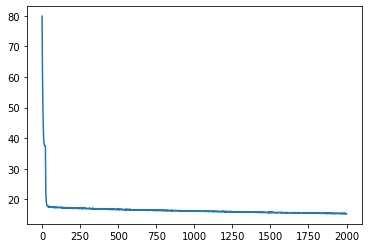

In [21]:
plt.plot(history.history['root_mean_squared_error'])
plt.show()

In [22]:
result = reg.predict(X_test)

33/33 [==============================] - 0s 2ms/step


In [23]:
result = np.ravel(result)

In [24]:
print('RMSE: ',np.sqrt(mean_squared_error(result,Y_test)))

RMSE:  12.629502557538373


In [25]:
def plotfun(testdata, result, Y_test, x, pval):
    g2 = testdata.groupby([0])
    d2 = (g2.last()).sort_index().reset_index().drop_duplicates()
    
    low=0
    for i in range(x):
        if(i==x-1):
            high=d2.iloc[i][1]
        else:
            low+=d2.iloc[i][1]    
    
    if(pval):
        print('Lower Limit: ',low)
        print('Upper Limit: ',low + high)
        print('Cycles:',high)
        
    low = int(low)
    high=int(high)
    
    fig=plt.figure(figsize=[10,5])
    plt.plot(range(1,int(high)+1),Y_test[low:low+high])
    plt.plot(range(1,int(high)+1),result[low:low+high])
    plt.ylim([0,150])
    plt.xlabel('Cycles')
    plt.ylabel('RUL')
    plt.title('Testing turbine ' + str(x))
    plt.legend(['Actual','Predicted'])

Lower Limit:  12929.0
Upper Limit:  13084.0
Cycles: 155.0


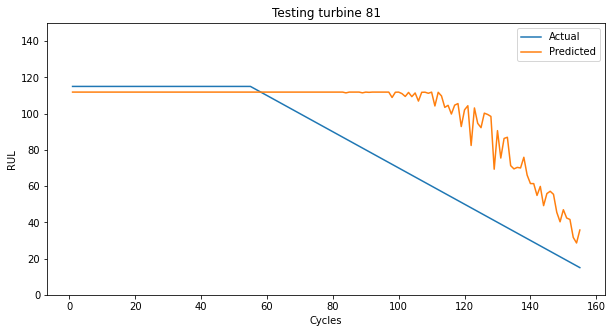

In [26]:
plotfun(testdata, result, Y_test, 81, True)

Text(0.5, 1.0, 'Testing turbine 3 - RUL Deviation')

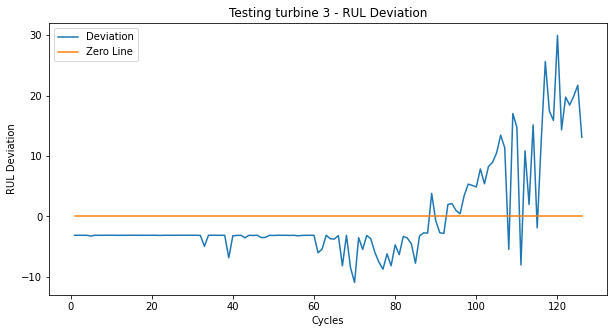

In [27]:
fig=plt.figure(figsize=[10,5])
plt.plot(range(1,127),(result[80:206]-Y_test[80:206]))
plt.plot(range(1,127),np.zeros((126)))
plt.xlabel('Cycles')
plt.ylabel('RUL Deviation')
plt.legend(['Deviation','Zero Line'])
plt.title('Testing turbine 3 - RUL Deviation')